# MetOffice Historic Stations Data

In [1]:
#%matplotlib inline 
# this line is required for the plots to appear in the Jupyter cells, rather than launching the matplotlib GUI
%matplotlib notebook
#this allows interactive view but you need to be in classic rather than CoCalc Jupyter notebook for this to work

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import warnings


# Let printing work the same in Python 2 and 3
from __future__ import division,print_function

# notice two underscores _ either side of future

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## March rainfall & sunshine at Aberporth over the years

=== Linear Fit Results for March Rainfall ===Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Slope (m): -0.0177 ± 0.1411 [mm/year]
Intercept (c): 95.69 ± 279.89 [mm]


<IPython.core.display.Javascript object>


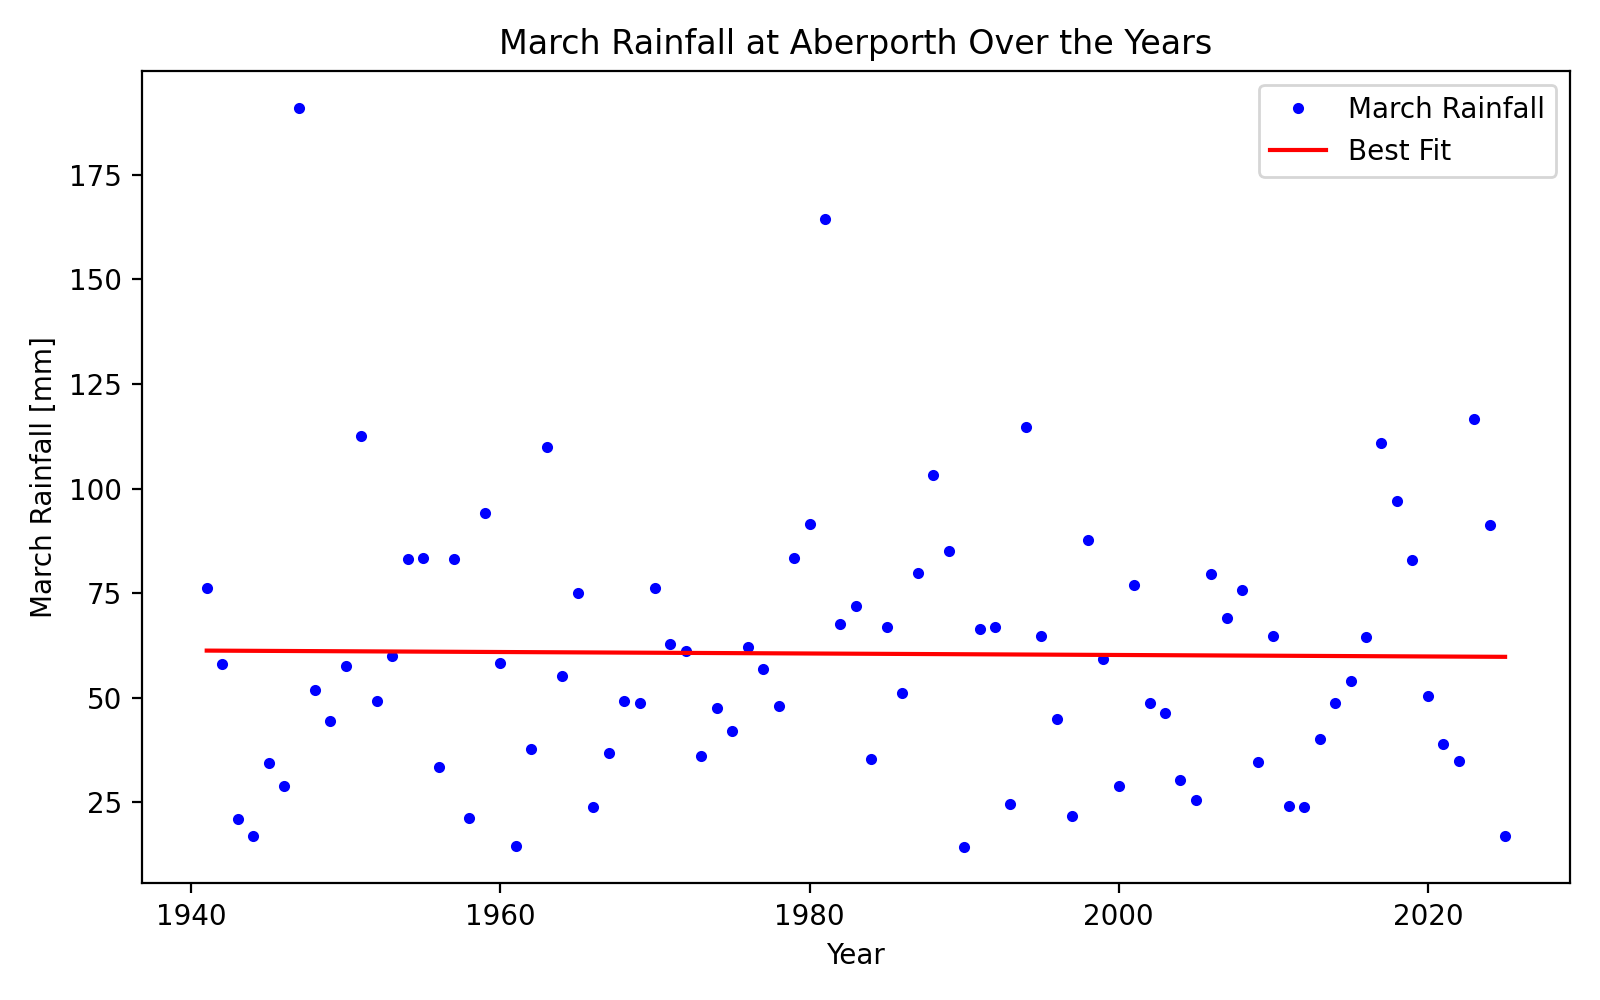

In [2]:
# robust loader that handles '# Provisional' comments
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue
            line = line.split('#')[0].strip()
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)

# use the robust loader!
data = load_clean_data('aberporthdata.txt')

# extract columns
year = data[:, 0]
month = data[:, 1]
rain = data[:, 5]

# filter for March
march_mask = month == 3
march_years = year[march_mask]
march_rain = rain[march_mask]

# remove NaNs
valid = ~np.isnan(march_rain)
march_years = march_years[valid]
march_rain = march_rain[valid]

# check for duplicates
assert len(march_years) == len(set(march_years)), "Duplicate years found!"

# fit line with uncertainties
(coefs, cov) = np.polyfit(march_years, march_rain, 1, cov=True)
m, c = coefs
m_err, c_err = np.sqrt(np.diag(cov))

print("=== Linear Fit Results for March Rainfall ===")
print(f"Slope (m): {m:.4f} ± {m_err:.4f} [mm/year]")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f} [mm]")

# line of best fit
fit_line = m * march_years + c

plt.figure(figsize=(8, 5))
plt.plot(march_years, march_rain, 'b.', label='March Rainfall')
plt.plot(march_years, fit_line, 'r-', label='Best Fit')
plt.xlabel('Year')
plt.ylabel('March Rainfall [mm]')
plt.title('March Rainfall at Aberporth Over the Years')
plt.legend()

plt.tight_layout()
plt.show()




=== Linear Fit Results for March Sunshine ===Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Slope     (m):  -0.0986 ± 0.1408   [hours/year]
Intercept (c):   319.54 ± 279.21   [hours]


<IPython.core.display.Javascript object>


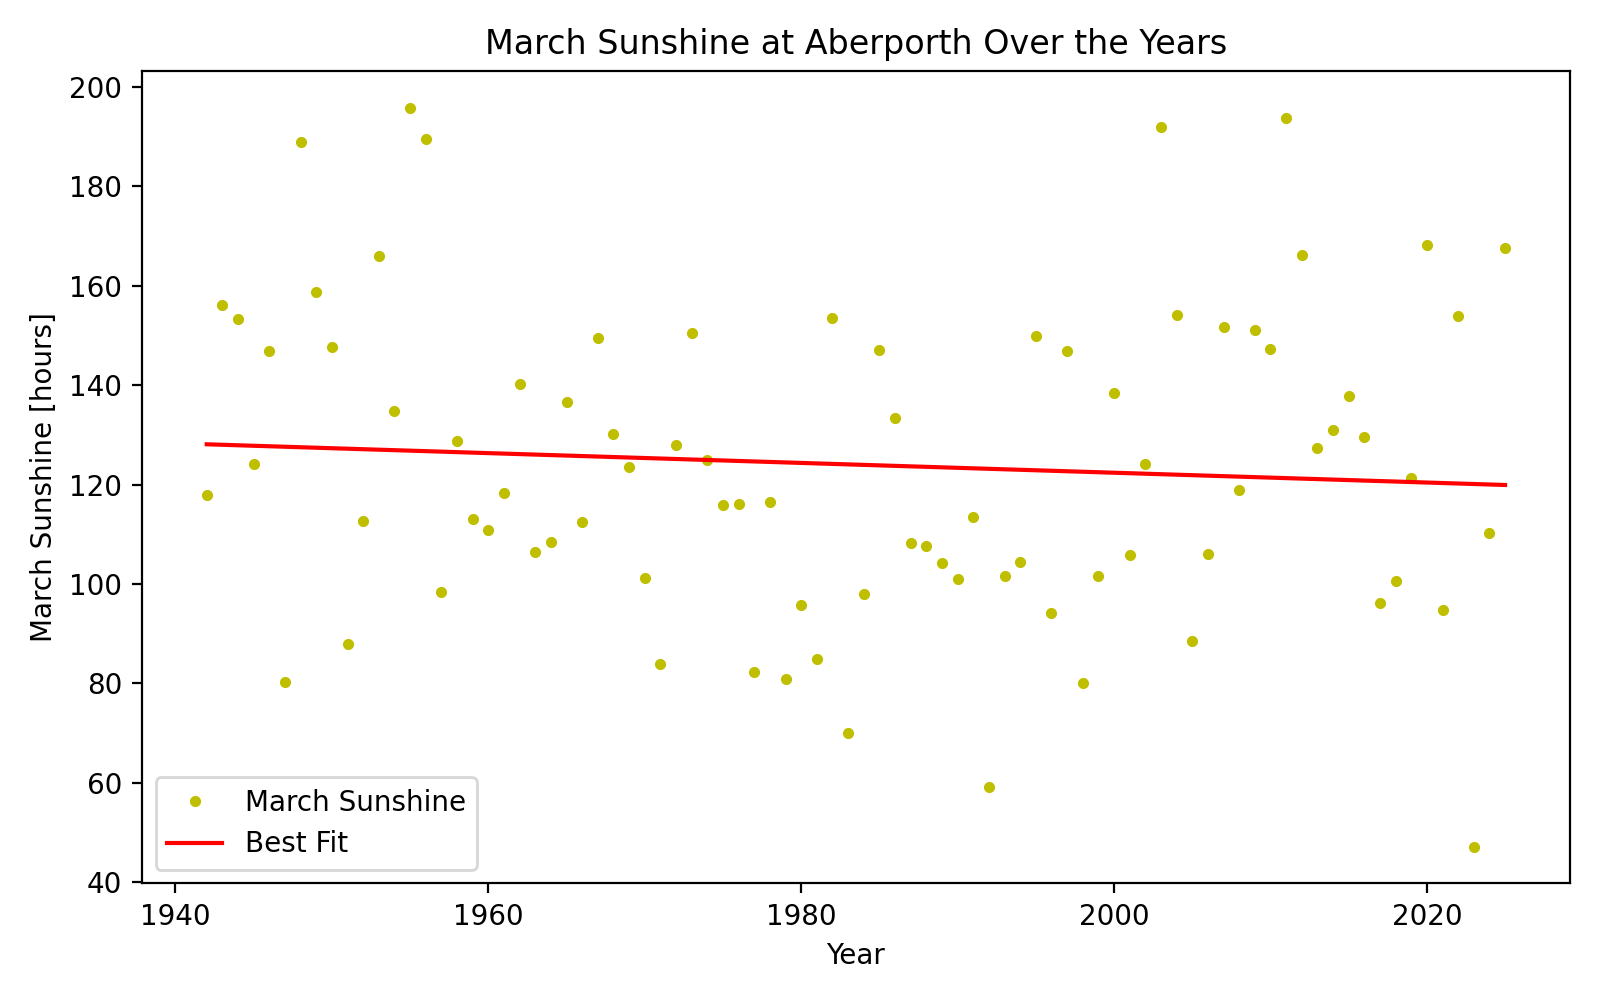

In [3]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue  
            line = line.split('#')[0].strip() 
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)

data = load_clean_data('aberporthdata.txt')


year = data[:, 0]
month = data[:, 1]
sun = data[:, 6]


march_mask = month == 3
march_years = year[march_mask]
march_sun = sun[march_mask]


valid = ~np.isnan(march_sun)
march_years = march_years[valid]
march_sun = march_sun[valid]


(coefs, cov) = np.polyfit(march_years, march_sun, 1, cov=True)
m, c = coefs
m_err, c_err = np.sqrt(np.diag(cov))

print("=== Linear Fit Results for March Sunshine ===")
print(f"Slope     (m): {m:8.4f} ± {m_err:.4f}   [hours/year]")
print(f"Intercept (c): {c:8.2f} ± {c_err:.2f}   [hours]")

fit_line = m * march_years + c


plt.figure(figsize=(8, 5))
plt.plot(march_years, march_sun, 'y.', label='March Sunshine')
plt.plot(march_years, fit_line, 'r-', label='Best Fit')
plt.xlabel('Year')
plt.ylabel('March Sunshine [hours]')
plt.title('March Sunshine at Aberporth Over the Years')
plt.legend()
plt.tight_layout()
plt.show()


shawburydata.txt: Total Mar–May 2025 rainfall = 71.2 mm
yeoviltondata.txt: Total Mar–May 2025 rainfall = 39.6 mm
leucharsdata.txt: Total Mar–May 2025 rainfall = 65.6 mm
cambornedata.txt: Total Mar–May 2025 rainfall = 150.6 mm
hurndata.txt: Total Mar–May 2025 rainfall = 70.0 mm
tireedata.txt: Total Mar–May 2025 rainfall = 140.4 mm
valleydata.txt: Total Mar–May 2025 rainfall = 121.0 mm
lerwickdata.txt: Total Mar–May 2025 rainfall = 245.8 mm
sheffielddata.txt: Total Mar–May 2025 rainfall = 70.8 mm
waddingtondata.txt: Total Mar–May 2025 rainfall = 39.2 mm
rossonwyedata.txt: Total Mar–May 2025 rainfall = 33.8 mm
aberporthdata.txt: Total Mar–May 2025 rainfall = 117.4 mm
heathrowdata.txt: Total Mar–May 2025 rainfall = 38.6 mm
stornowaydata.txt: Total Mar–May 2025 rainfall = 187.2 mm
manstondata.txt: Total Mar–May 2025 rainfall = 33.8 mm
eskdalemuirdata.txt: Total Mar–May 2025 rainfall = 229.4 mm
Average Mar–May 2025 rainfall across all stations: 103.4 mm
Intel MKL WARNING: Support of Intel(R)

<IPython.core.display.Javascript object>


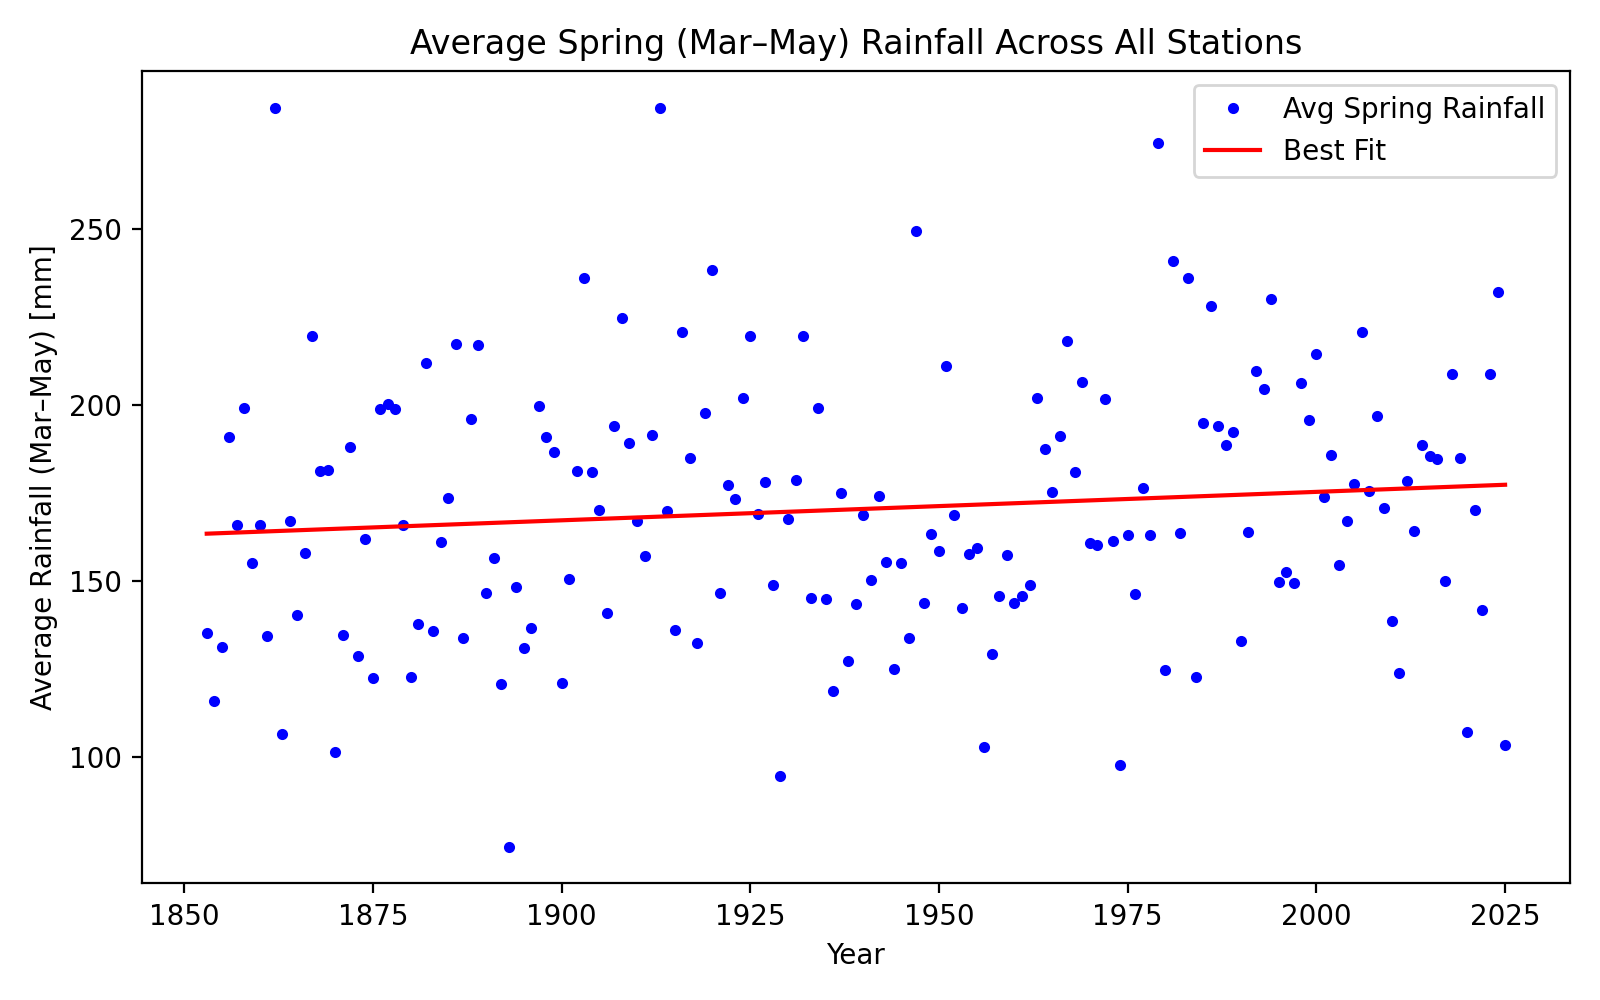

In [4]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue
            line = line.split('#')[0].strip()
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)

file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

rain_by_year = {}
spring_2025_totals = []

for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.shape[1] != 7:
            print(f"Skipping {filename}: unexpected shape {data.shape}")
            continue

        year = data[:, 0]
        month = data[:, 1]
        rain = data[:, 5]


        mask = (month >= 3) & (month <= 5)
        year = year[mask]
        rain = rain[mask]


        valid = ~np.isnan(rain)
        year = year[valid]
        rain = rain[valid]

        for y in np.unique(year):
            spring_rain = np.sum(rain[year == y])
            rain_by_year.setdefault(y, []).append(spring_rain)

           
            if int(y) == 2025:
                print(f"{filename}: Total Mar–May 2025 rainfall = {spring_rain:.1f} mm")
                spring_2025_totals.append(spring_rain)

    except Exception as e:
        print(f"Failed to process {filename}: {e}")


if spring_2025_totals:
    avg_2025 = np.mean(spring_2025_totals)
    print(f"Average Mar–May 2025 rainfall across all stations: {avg_2025:.1f} mm")
else:
    print("No 2025 spring rainfall data found in any station")


common_years = sorted(rain_by_year.keys())
avg_rain = np.array([np.mean(rain_by_year[y]) for y in common_years])
common_years = np.array(common_years)


(coefs, cov) = np.polyfit(common_years, avg_rain, 1, cov=True)
m, c = coefs
m_err, c_err = np.sqrt(np.diag(cov))
fit_line = m * common_years + c


print("\n=== Linear Fit: Average Spring Rainfall ===")
print(f"Slope     (m): {m:.4f} ± {m_err:.4f}   [mm/year]")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f}   [mm]")


plt.figure(figsize=(8, 5))
plt.plot(common_years, avg_rain, 'b.', label='Avg Spring Rainfall')
plt.plot(common_years, fit_line, 'r-', label='Best Fit')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (Mar–May) [mm]')
plt.title('Average Spring (Mar–May) Rainfall Across All Stations')
plt.legend()
plt.tight_layout()
plt.show()


shawburydata.txt: Total Mar–May 2025 sunshine = 613.6 hours
yeoviltondata.txt: Total Mar–May 2025 sunshine = 618.9 hours
leucharsdata.txt: Total Mar–May 2025 sunshine = 639.6 hours
cambornedata.txt: Total Mar–May 2025 sunshine = 365.9 hours
hurndata.txt: Total Mar–May 2025 sunshine = 686.9 hours
tireedata.txt: Total Mar–May 2025 sunshine = 654.8 hours
valleydata.txt: Total Mar–May 2025 sunshine = 728.2 hours
lerwickdata.txt: Total Mar–May 2025 sunshine = 447.3 hours
sheffielddata.txt: Total Mar–May 2025 sunshine = 604.2 hours
waddingtondata.txt: Total Mar–May 2025 sunshine = 485.6 hours
rossonwyedata.txt: Total Mar–May 2025 sunshine = 611.2 hours
aberporthdata.txt: Total Mar–May 2025 sunshine = 668.5 hours
heathrowdata.txt: Total Mar–May 2025 sunshine = 665.7 hours
stornowaydata.txt: Total Mar–May 2025 sunshine = 535.0 hours
manstondata.txt: Total Mar–May 2025 sunshine = 725.9 hours
eskdalemuirdata.txt: Total Mar–May 2025 sunshine = 577.1 hours
Average Mar–May 2025 sunshine across all 

<IPython.core.display.Javascript object>


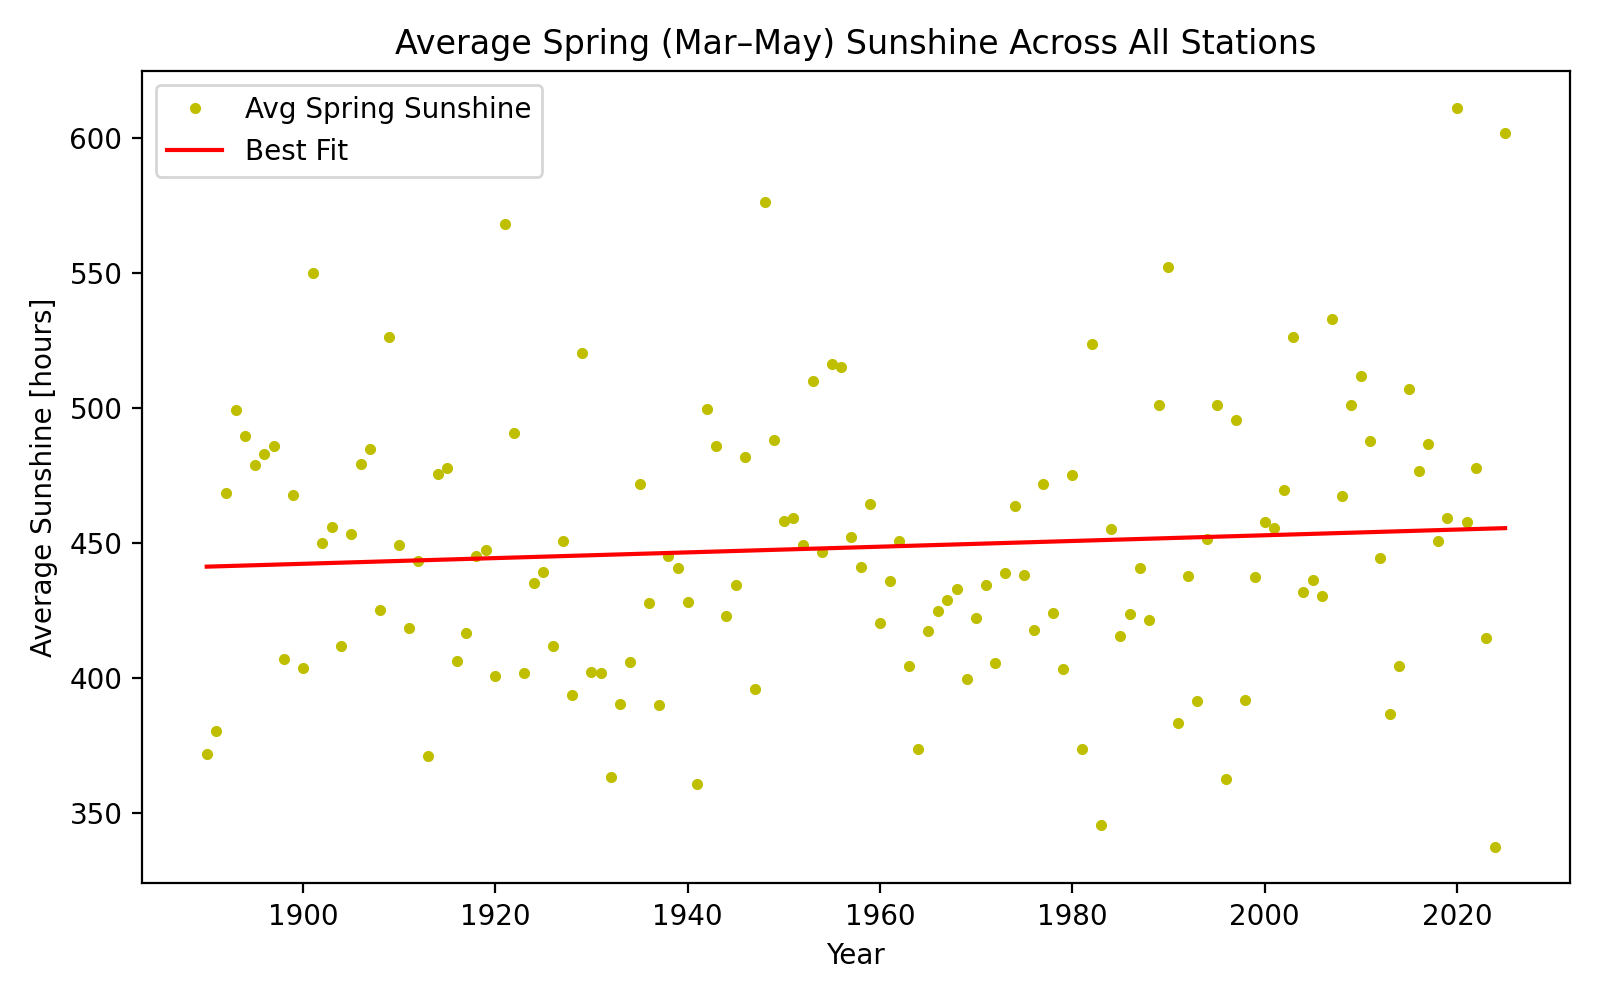

In [5]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue  
            line = line.split('#')[0].strip()  
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

sun_by_year = {}
spring_2025_sunshine_totals = []


for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.shape[1] != 7:
            continue  

        year = data[:, 0]
        month = data[:, 1]
        sun = data[:, 6]

   
        mask = (month >= 3) & (month <= 5)
        year = year[mask]
        sun = sun[mask]


        valid = ~np.isnan(sun)
        year = year[valid]
        sun = sun[valid]

        for y in np.unique(year):
            spring_sun = np.sum(sun[year == y])
            sun_by_year.setdefault(y, []).append(spring_sun)

            if int(y) == 2025:
                spring_2025_sunshine_totals.append(spring_sun)
                print(f"{filename}: Total Mar–May 2025 sunshine = {spring_sun:.1f} hours")

    except Exception as e:
        print(f"Failed to process {filename}: {e}")


common_years = sorted(sun_by_year.keys())
avg_sun = np.array([np.mean(sun_by_year[y]) for y in common_years])
common_years = np.array(common_years)


if spring_2025_sunshine_totals:
    avg_2025 = np.mean(spring_2025_sunshine_totals)
    print(f"Average Mar–May 2025 sunshine across all stations: {avg_2025:.1f} hours")
else:
    print("No 2025 spring sunshine data found in any station")


(coefs, cov) = np.polyfit(common_years, avg_sun, 1, cov=True)
m, c = coefs
m_err, c_err = np.sqrt(np.diag(cov))
fit_line = m * common_years + c


print("\n=== Linear Fit: Average Spring Sunshine ===")
print(f"Slope     (m): {m:.4f} ± {m_err:.4f}   [hours/year]")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f}   [hours]")


plt.figure(figsize=(8, 5))
plt.plot(common_years, avg_sun, 'y.', label='Avg Spring Sunshine')
plt.plot(common_years, fit_line, 'r-', label='Best Fit')


plt.xlabel('Year')
plt.ylabel('Average Sunshine [hours]')
plt.title('Average Spring (Mar–May) Sunshine Across All Stations')
plt.legend()
plt.tight_layout()
plt.show()




Average spring rainfall in 2025: 103.4 mm


<IPython.core.display.Javascript object>


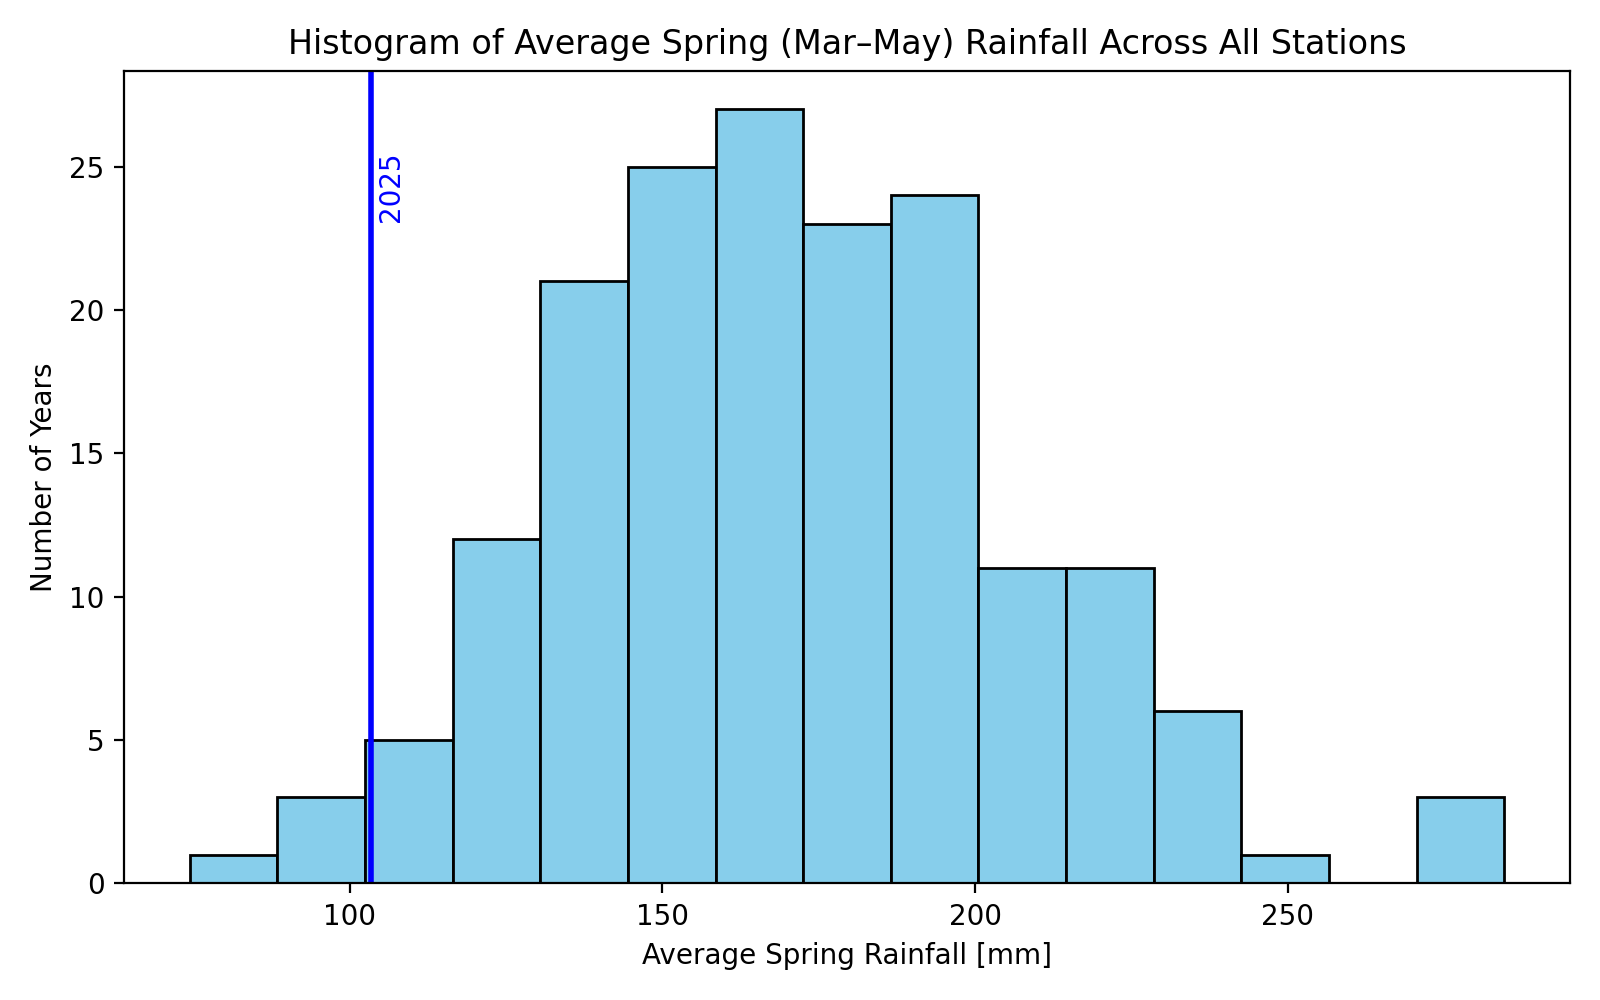

In [6]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue  
            line = line.split('#')[0].strip()  
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

rain_by_year = {}
rain_2025_list = []

for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.ndim != 2 or data.shape[1] != 7:
            continue  

        year = data[:, 0]
        month = data[:, 1]
        rain = data[:, 5]

        
        spring_mask = (month >= 3) & (month <= 5)
        year_spring = year[spring_mask]
        rain_spring = rain[spring_mask]

        
        valid = ~np.isnan(rain_spring)
        year_spring = year_spring[valid]
        rain_spring = rain_spring[valid]

        
        for y in np.unique(year_spring):
            y_mask = np.isclose(year_spring, y)
            total = np.sum(rain_spring[y_mask])
            rain_by_year.setdefault(int(y), []).append(total)

       
        if np.any(np.isclose(year_spring, 2025)):
            r2025 = np.sum(rain_spring[np.isclose(year_spring, 2025)])
            rain_2025_list.append(r2025)

    except Exception:
        continue  


common_years = sorted(rain_by_year.keys())
avg_rain = np.array([np.mean(rain_by_year[y]) for y in common_years])
common_years = np.array(common_years)


highlight = False
if len(rain_2025_list) > 0:
    avg_rain_2025 = np.mean(rain_2025_list)
    highlight = True
    
    print(f"\nAverage spring rainfall in 2025: {avg_rain_2025:.1f} mm")
else:
    highlight = False


plt.figure(figsize=(8, 5))
plt.hist(avg_rain, bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Average Spring Rainfall [mm]')
plt.ylabel('Number of Years')
plt.title('Histogram of Average Spring (Mar–May) Rainfall Across All Stations')

if highlight:
    plt.axvline(avg_rain_2025, color='b', linestyle='-', linewidth=2)
    plt.text(avg_rain_2025 + 1,
             plt.ylim()[1] * 0.9,
             f'2025',
             color='b',
             rotation=90,
             va='top',
             ha='left',
             fontsize=10)

plt.tight_layout()
plt.show()


Average spring sunshine in 2025: 601.8 hours


<IPython.core.display.Javascript object>


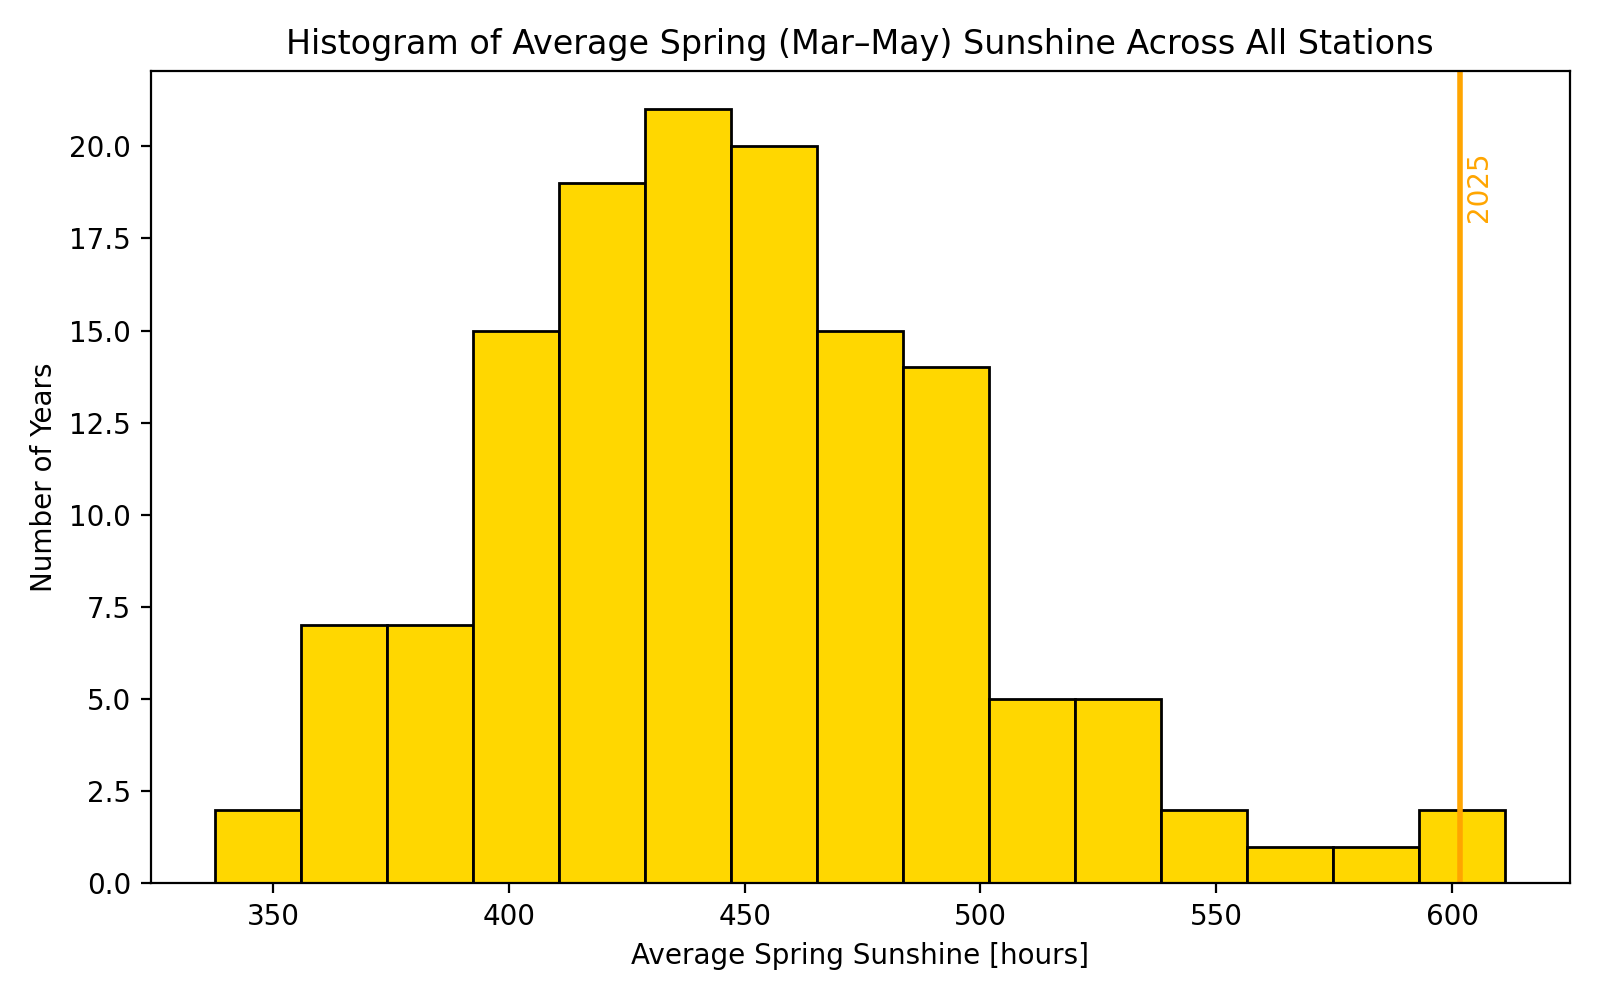

In [7]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue  
            line = line.split('#')[0].strip() 
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

sun_by_year = {}
sun_2025_list = []

for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.ndim != 2 or data.shape[1] != 7:
            continue

        year = data[:, 0]
        month = data[:, 1]
        sun = data[:, 6]  

       
        spring_mask = (month >= 3) & (month <= 5)
        year_spring = year[spring_mask]
        sun_spring = sun[spring_mask]

        valid = ~np.isnan(sun_spring)
        year_spring = year_spring[valid]
        sun_spring = sun_spring[valid]

        for y in np.unique(year_spring):
            y_mask = np.isclose(year_spring, y)
            total = np.sum(sun_spring[y_mask])
            sun_by_year.setdefault(int(y), []).append(total)

        if np.any(np.isclose(year_spring, 2025)):
            s2025 = np.sum(sun_spring[np.isclose(year_spring, 2025)])
            sun_2025_list.append(s2025)

    except Exception:
        continue


common_years = sorted(sun_by_year.keys())
avg_sun = np.array([np.mean(sun_by_year[y]) for y in common_years])
common_years = np.array(common_years)

highlight = False
if len(sun_2025_list) > 0:
    avg_sun_2025 = np.mean(sun_2025_list)
    highlight = True
    print(f"\nAverage spring sunshine in 2025: {avg_sun_2025:.1f} hours")


plt.figure(figsize=(8, 5))
plt.hist(avg_sun, bins=15, color='gold', edgecolor='black')
plt.xlabel('Average Spring Sunshine [hours]')
plt.ylabel('Number of Years')
plt.title('Histogram of Average Spring (Mar–May) Sunshine Across All Stations')

if highlight:
    plt.axvline(avg_sun_2025, color='orange', linestyle='-', linewidth=2)
    plt.text(avg_sun_2025 + 1,
             plt.ylim()[1] * 0.9,
             f'2025',
             color='orange',
             rotation=90,
             va='top',
             ha='left',
             fontsize=10)

plt.tight_layout()
plt.show()


Total rainfall Oct 2023 – Feb 2024: 553.5 mm
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Slope     (m): 0.5253 ± 0.1116 [mm/year]
Intercept (c): -613.21 ± 216.39 [mm]


<IPython.core.display.Javascript object>


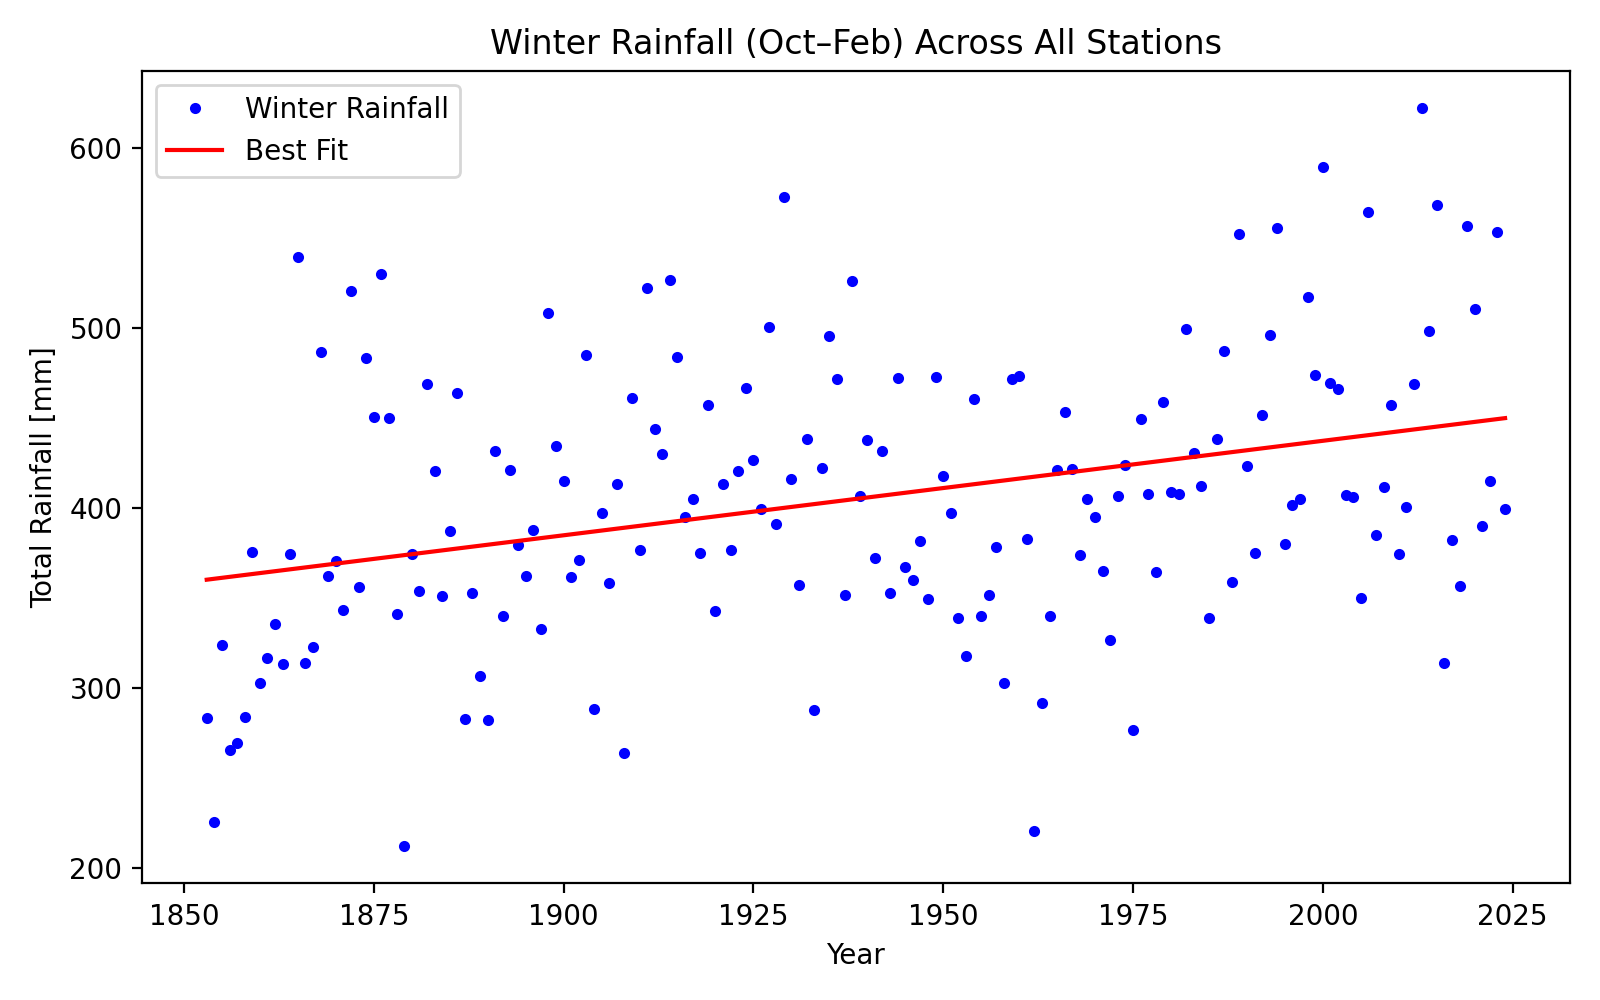

In [8]:
def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue
            line = line.split('#')[0].strip()
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

winter_rain_by_year = {}
rain_2023_2024 = []

for filename in file_list:
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            data = load_clean_data(filename)

        if data.ndim != 2 or data.shape[1] != 7:
            continue

        year = data[:, 0].astype(int)
        month = data[:, 1].astype(int)
        rain = data[:, 5]

        valid = ~np.isnan(rain)
        year = year[valid]
        month = month[valid]
        rain = rain[valid]

  
        for y in range(int(min(year)), int(max(year))):
            oct_dec_mask = (year == y) & (month >= 10) & (month <= 12)
            jan_feb_mask = (year == y + 1) & (month >= 1) & (month <= 2)

            total_rain = np.sum(rain[oct_dec_mask]) + np.sum(rain[jan_feb_mask])

            if not np.isnan(total_rain):
                winter_rain_by_year.setdefault(y, []).append(total_rain)

            if y == 2023:
                rain_2023_2024.append(total_rain)

    except Exception:
        continue


common_years = sorted(winter_rain_by_year.keys())
avg_winter_rain = np.array([np.mean(winter_rain_by_year[y]) for y in common_years])
common_years = np.array(common_years)


highlight = False
if len(rain_2023_2024) > 0:
    avg_2023_2024 = np.mean(rain_2023_2024)
    highlight = True
    print(f"\nTotal rainfall Oct 2023 – Feb 2024: {avg_2023_2024:.1f} mm")


(coefs, cov) = np.polyfit(common_years, avg_winter_rain, 1, cov=True)
m, c = coefs
m_err, c_err = np.sqrt(np.diag(cov))
fit_line = m * common_years + c


print(f"Slope     (m): {m:.4f} ± {m_err:.4f} [mm/year]")
print(f"Intercept (c): {c:.2f} ± {c_err:.2f} [mm]")


plt.figure(figsize=(8, 5))
plt.plot(common_years, avg_winter_rain, 'b.', label='Winter Rainfall')
plt.plot(common_years, fit_line, 'r-', label='Best Fit')


plt.xlabel('Year')
plt.ylabel('Total Rainfall [mm]')
plt.title('Winter Rainfall (Oct–Feb) Across All Stations')
plt.legend()
plt.tight_layout()
plt.show()



## Splitting South & North UK 

Found 17 stations in the North (lat ≥ 53.175)
Found 15 stations in the South (lat < 53.175)
leucharsdata.txt: Total Mar–May 2025 rainfall = 65.6 mm
tireedata.txt: Total Mar–May 2025 rainfall = 140.4 mm
valleydata.txt: Total Mar–May 2025 rainfall = 121.0 mm
lerwickdata.txt: Total Mar–May 2025 rainfall = 245.8 mm
sheffielddata.txt: Total Mar–May 2025 rainfall = 70.8 mm
waddingtondata.txt: Total Mar–May 2025 rainfall = 39.2 mm
stornowaydata.txt: Total Mar–May 2025 rainfall = 187.2 mm
eskdalemuirdata.txt: Total Mar–May 2025 rainfall = 229.4 mm
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
=== North (Lat ≥ 53.175) ===
Average Mar–May 2025 rainfall: 137.4 mm
Linear Fit: Slope = 0.1116 ± 0.0599, Intercept = -28.61 ± 116.25



<IPython.core.display.Javascript object>


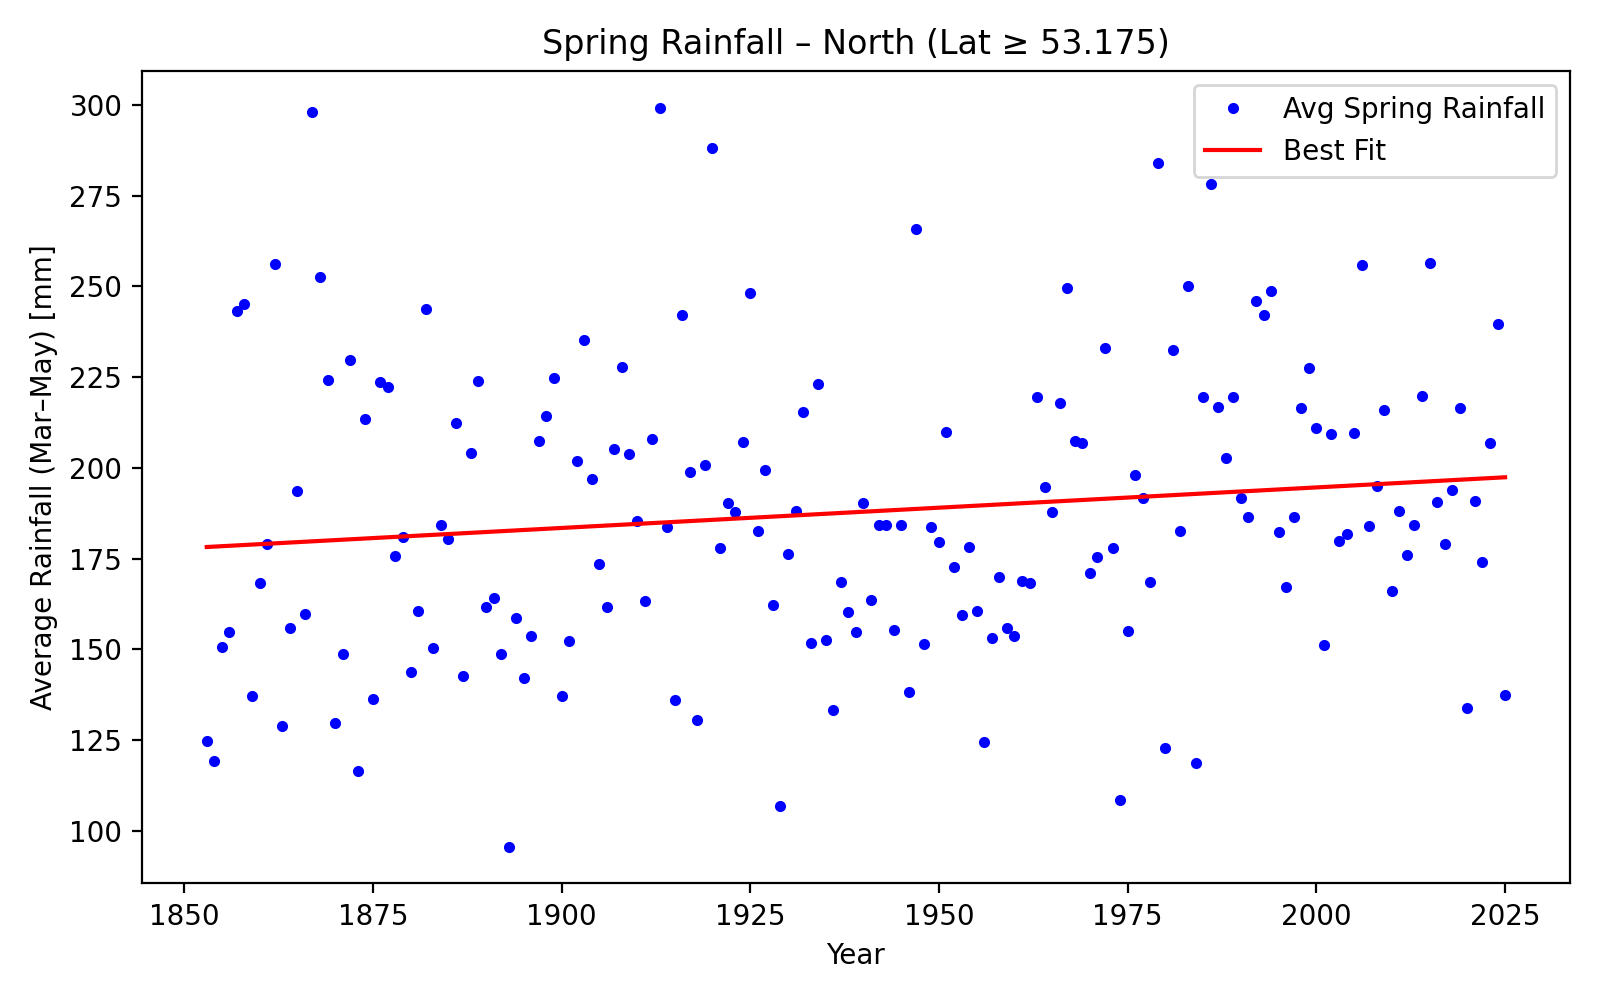

shawburydata.txt: Total Mar–May 2025 rainfall = 71.2 mm
yeoviltondata.txt: Total Mar–May 2025 rainfall = 39.6 mm
cambornedata.txt: Total Mar–May 2025 rainfall = 150.6 mm
hurndata.txt: Total Mar–May 2025 rainfall = 70.0 mm
rossonwyedata.txt: Total Mar–May 2025 rainfall = 33.8 mm
aberporthdata.txt: Total Mar–May 2025 rainfall = 117.4 mm
heathrowdata.txt: Total Mar–May 2025 rainfall = 38.6 mm
manstondata.txt: Total Mar–May 2025 rainfall = 33.8 mm

=== South (Lat < 53.175) ===
Average Mar–May 2025 rainfall: 69.4 mm
Linear Fit: Slope = 0.2098 ± 0.0715, Intercept = -258.67 ± 138.66
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<IPython.core.display.Javascript object>


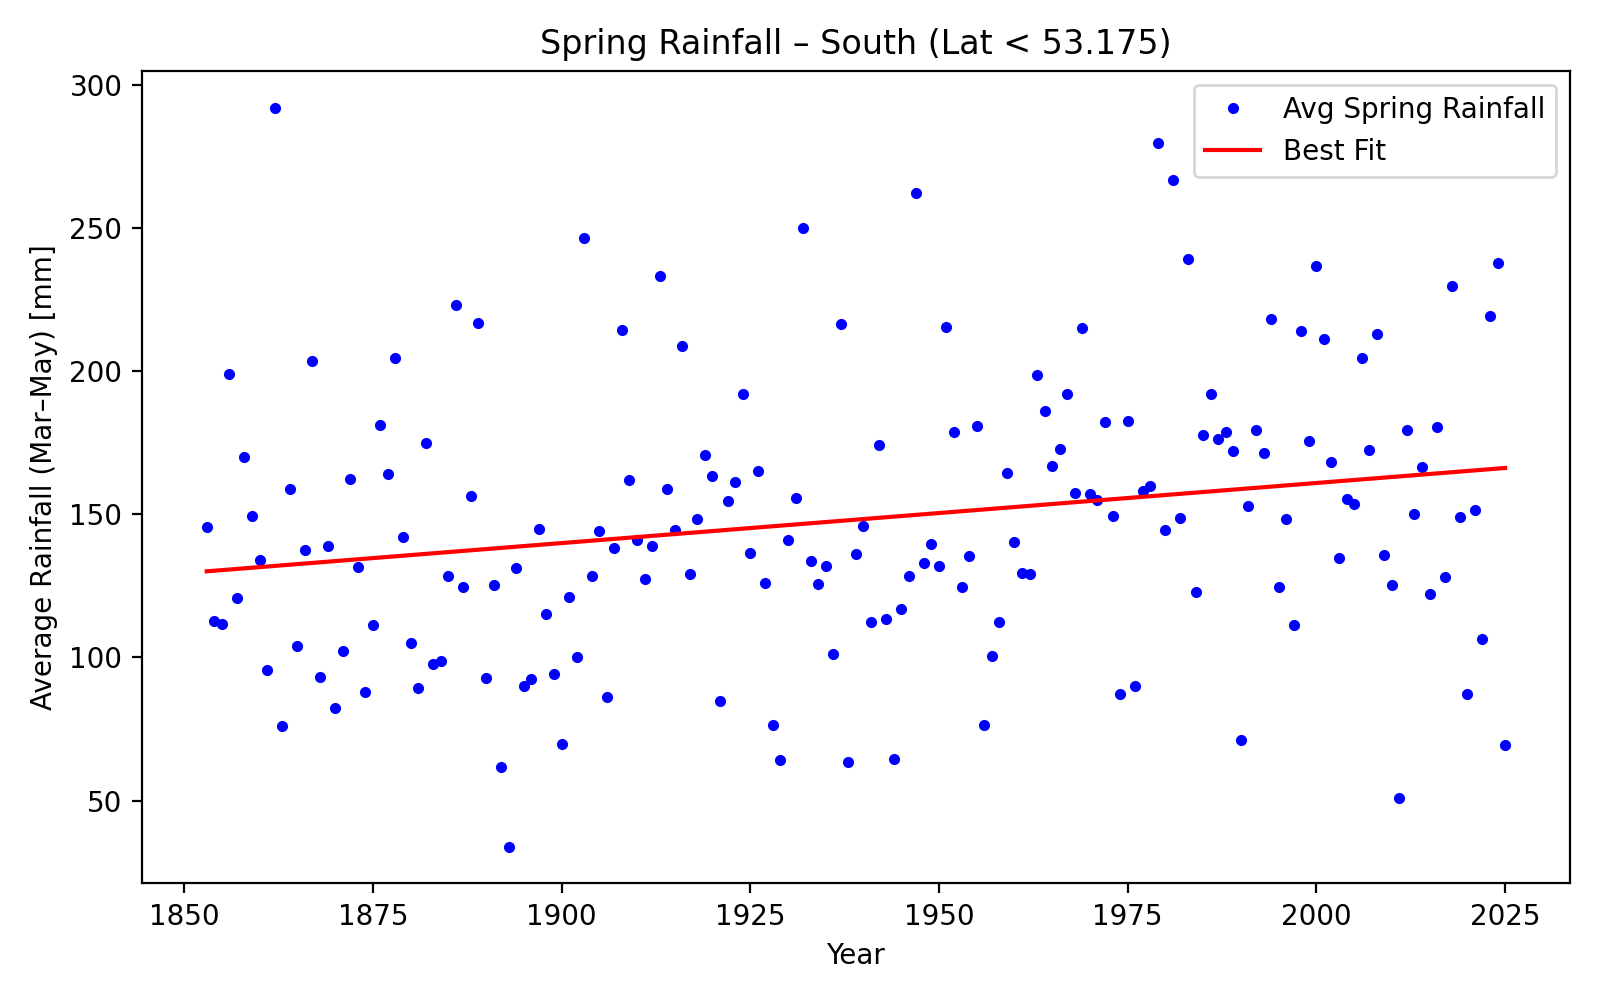

In [15]:
def get_station_latitude(filename):
    try:
        with open(filename, 'r') as f:
            lines = [next(f) for _ in range(2)]
            second_line = lines[1].lower()
            if 'lat' in second_line:
                parts = second_line.replace(',', '').split()
                for i, part in enumerate(parts):
                    if part == 'lat' and i + 1 < len(parts):
                        try:
                            return float(parts[i + 1])
                        except ValueError:
                            continue
    except Exception as e:
        print(f"Could not read latitude from {filename}: {e}")
    return None


def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue 
            line = line.split('#')[0].strip()  
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

north_files = []
south_files = []

for f in file_list:
    lat = get_station_latitude(f)
    if lat is not None:
        if lat >= 53.175:
            north_files.append(f)
        else:
            south_files.append(f)

print(f"Found {len(north_files)} stations in the North (lat ≥ 53.175)")
print(f"Found {len(south_files)} stations in the South (lat < 53.175)")


def process_group(file_group, label):
    rain_by_year = {}
    spring_2025_totals = []

    for filename in file_group:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=UserWarning)
                data = load_clean_data(filename)

            if data.shape[1] != 7:
                continue

            year = data[:, 0]
            month = data[:, 1]
            rain = data[:, 5]

            mask = (month >= 3) & (month <= 5)
            year = year[mask]
            rain = rain[mask]

            valid = ~np.isnan(rain)
            year = year[valid]
            rain = rain[valid]

            for y in np.unique(year):
                spring_rain = np.sum(rain[year == y])
                rain_by_year.setdefault(y, []).append(spring_rain)

                if int(y) == 2025:
                    spring_2025_totals.append(spring_rain)
                    print(f"{filename}: Total Mar–May 2025 rainfall = {spring_rain:.1f} mm")

        except Exception as e:
            print(f"Failed to process {filename}: {e}")

    common_years = sorted(rain_by_year.keys())
    avg_rain = np.array([np.mean(rain_by_year[y]) for y in common_years])
    common_years = np.array(common_years)


    if len(common_years) == 0:
        print(f"\nNo valid data for {label}. Skipping plot.\n")
        return

    (coefs, cov) = np.polyfit(common_years, avg_rain, 1, cov=True)
    m, c = coefs
    m_err, c_err = np.sqrt(np.diag(cov))
    fit_line = m * common_years + c

    print(f"\n=== {label} ===")
    if spring_2025_totals:
        avg_2025 = np.mean(spring_2025_totals)
        print(f"Average Mar–May 2025 rainfall: {avg_2025:.1f} mm")
    else:
        avg_2025 = None
        print("No 2025 rainfall data found.")

    print(f"Linear Fit: Slope = {m:.4f} ± {m_err:.4f}, Intercept = {c:.2f} ± {c_err:.2f}")

    plt.figure(figsize=(8, 5))
    plt.plot(common_years, avg_rain, 'b.', label='Avg Spring Rainfall')
    plt.plot(common_years, fit_line, 'r-', label='Best Fit')
    plt.xlabel('Year')
    plt.ylabel('Average Rainfall (Mar–May) [mm]')
    plt.title(f'Spring Rainfall – {label}')
    plt.legend()
    plt.tight_layout()
    plt.show()

process_group(north_files, 'North (Lat ≥ 53.175)')
process_group(south_files, 'South (Lat < 53.175)')


Found 17 stations in the North (lat ≥ 53.175)
Found 15 stations in the South (lat < 53.175)
leucharsdata.txt: Total Mar–May 2025 sunshine = 639.6 hours
tireedata.txt: Total Mar–May 2025 sunshine = 654.8 hours
valleydata.txt: Total Mar–May 2025 sunshine = 728.2 hours
lerwickdata.txt: Total Mar–May 2025 sunshine = 447.3 hours
sheffielddata.txt: Total Mar–May 2025 sunshine = 604.2 hours
waddingtondata.txt: Total Mar–May 2025 sunshine = 485.6 hours
stornowaydata.txt: Total Mar–May 2025 sunshine = 535.0 hours
eskdalemuirdata.txt: Total Mar–May 2025 sunshine = 577.1 hours
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

=== North (Lat ≥ 53.175) ===
Average Mar–May 2025 sunshine: 584.0 hours
Linear Fit: Slope = 0.2648 ± 0.1034, Intercept = -91.95 ± 202.36


<IPython.core.display.Javascript object>


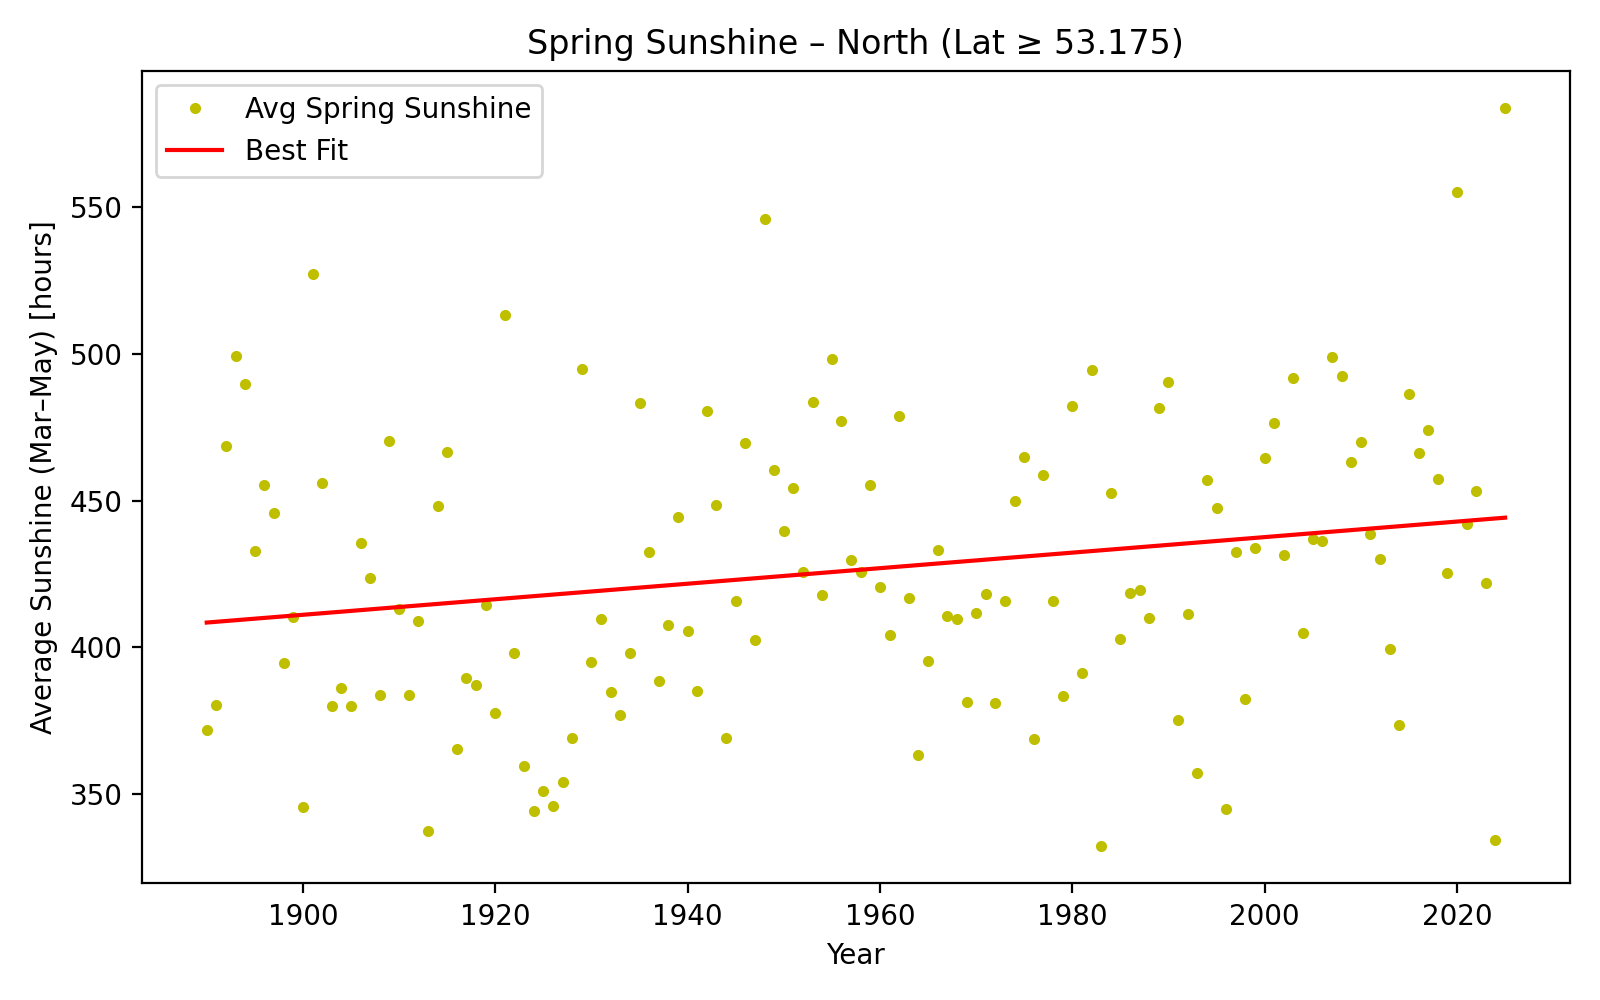

shawburydata.txt: Total Mar–May 2025 sunshine = 613.6 hours
yeoviltondata.txt: Total Mar–May 2025 sunshine = 618.9 hours
cambornedata.txt: Total Mar–May 2025 sunshine = 365.9 hours
hurndata.txt: Total Mar–May 2025 sunshine = 686.9 hours
rossonwyedata.txt: Total Mar–May 2025 sunshine = 611.2 hours
aberporthdata.txt: Total Mar–May 2025 sunshine = 668.5 hours
heathrowdata.txt: Total Mar–May 2025 sunshine = 665.7 hours
manstondata.txt: Total Mar–May 2025 sunshine = 725.9 hours

=== South (Lat < 53.175) ===
Average Mar–May 2025 sunshine: 619.6 hours
Linear Fit: Slope = 0.1375 ± 0.2416, Intercept = 199.36 ± 477.66
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<IPython.core.display.Javascript object>


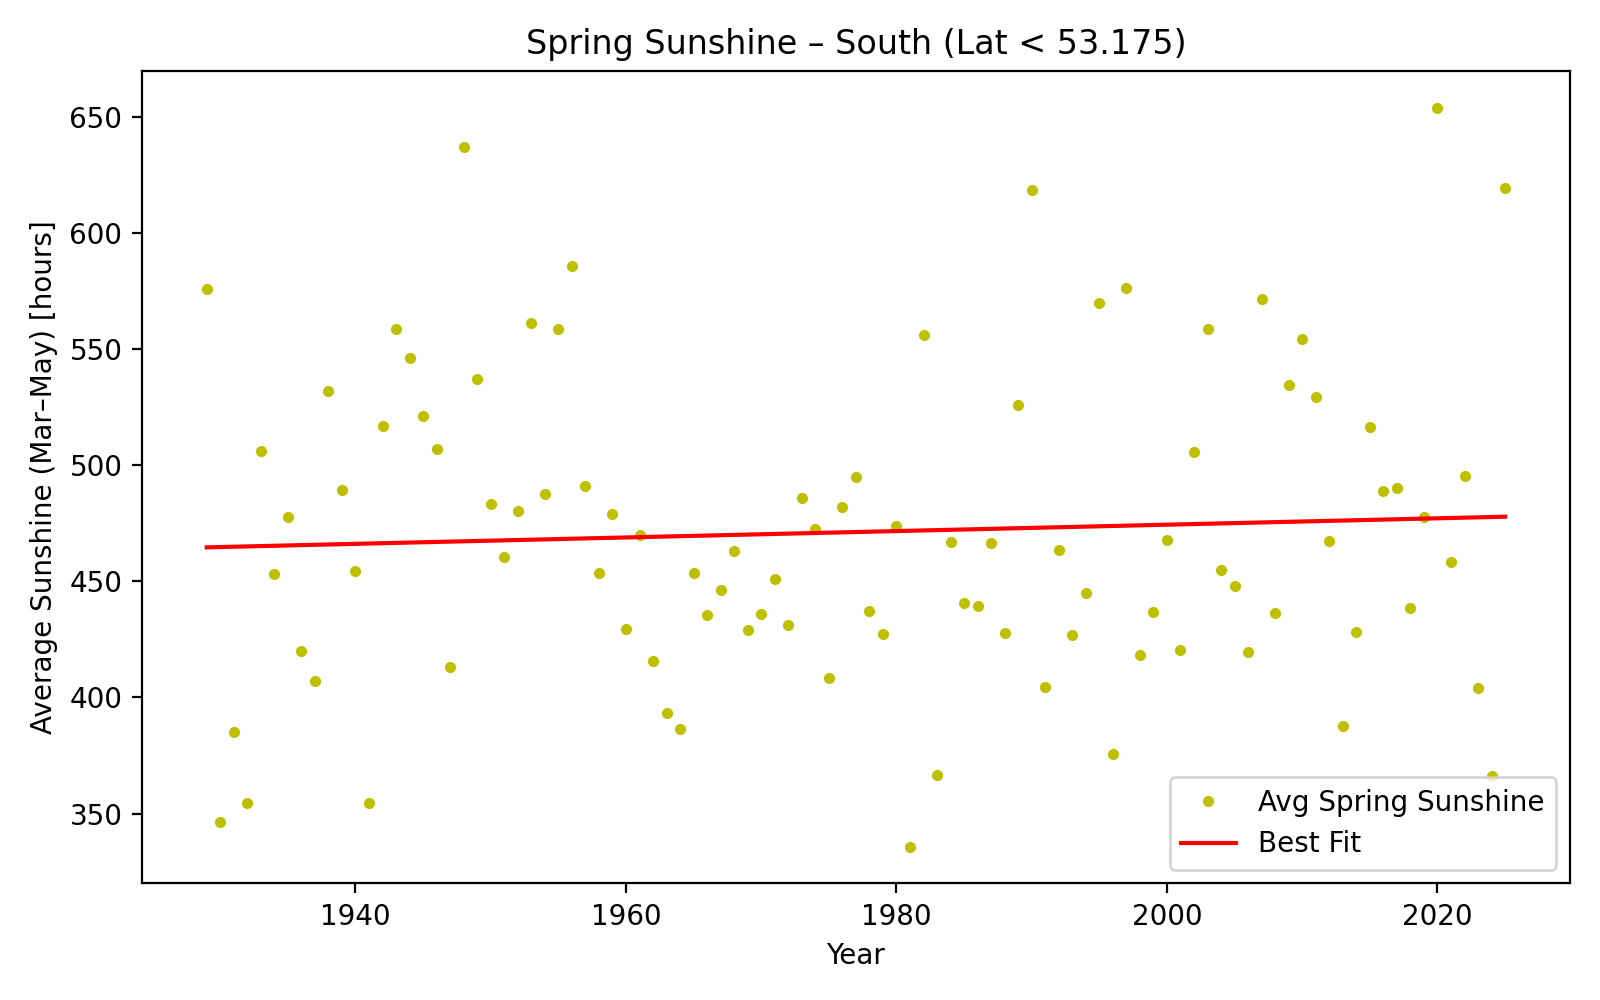

In [16]:
def get_station_latitude(filename):
    try:
        with open(filename, 'r') as f:
            lines = [next(f) for _ in range(2)]
            second_line = lines[1].lower()
            if 'lat' in second_line:
                parts = second_line.replace(',', '').split()
                for i, part in enumerate(parts):
                    if part == 'lat' and i + 1 < len(parts):
                        try:
                            return float(parts[i + 1])
                        except ValueError:
                            continue
    except Exception as e:
        print(f"Could not read latitude from {filename}: {e}")
    return None


def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue
            line = line.split('#')[0].strip()
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)


file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

north_files = []
south_files = []

for f in file_list:
    lat = get_station_latitude(f)
    if lat is not None:
        if lat >= 53.175:
            north_files.append(f)
        else:
            south_files.append(f)

print(f"Found {len(north_files)} stations in the North (lat ≥ 53.175)")
print(f"Found {len(south_files)} stations in the South (lat < 53.175)")

def process_group(file_group, label):
    sun_by_year = {}
    spring_2025_totals = []

    for filename in file_group:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=UserWarning)
                data = load_clean_data(filename)

            if data.shape[1] != 7:
                continue

            year = data[:, 0]
            month = data[:, 1]
            sun = data[:, 6]  

            mask = (month >= 3) & (month <= 5)
            year = year[mask]
            sun = sun[mask]

            valid = ~np.isnan(sun)
            year = year[valid]
            sun = sun[valid]

            for y in np.unique(year):
                spring_sun = np.sum(sun[year == y])
                sun_by_year.setdefault(y, []).append(spring_sun)

                if int(y) == 2025:
                    spring_2025_totals.append(spring_sun)
                    print(f"{filename}: Total Mar–May 2025 sunshine = {spring_sun:.1f} hours")

        except Exception as e:
            print(f"Failed to process {filename}: {e}")

    common_years = sorted(sun_by_year.keys())
    avg_sun = np.array([np.mean(sun_by_year[y]) for y in common_years])
    common_years = np.array(common_years)

    if len(common_years) == 0:
        print(f"\n No valid sunshine data for {label}. Skipping plot.\n")
        return

    (coefs, cov) = np.polyfit(common_years, avg_sun, 1, cov=True)
    m, c = coefs
    m_err, c_err = np.sqrt(np.diag(cov))
    fit_line = m * common_years + c

    print(f"\n=== {label} ===")
    if spring_2025_totals:
        avg_2025 = np.mean(spring_2025_totals)
        print(f"Average Mar–May 2025 sunshine: {avg_2025:.1f} hours")
    else:
        avg_2025 = None
        print("No 2025 spring sunshine data found.")

    print(f"Linear Fit: Slope = {m:.4f} ± {m_err:.4f}, Intercept = {c:.2f} ± {c_err:.2f}")

    plt.figure(figsize=(8, 5))
    plt.plot(common_years, avg_sun, 'y.', label='Avg Spring Sunshine')
    plt.plot(common_years, fit_line, 'r-', label='Best Fit')
    plt.xlabel('Year')
    plt.ylabel('Average Sunshine (Mar–May) [hours]')
    plt.title(f'Spring Sunshine – {label}')
    plt.legend()
    plt.tight_layout()
    plt.show()

process_group(north_files, 'North (Lat ≥ 53.175)')
process_group(south_files, 'South (Lat < 53.175)')


Found 17 stations in the North (lat ≥ 53.175)
Found 15 stations in the South (lat < 53.175)
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
=== North (Lat ≥ 53.175) ===
Total Oct 2023 – Feb 2024 rainfall: 590.7 mm
Linear Fit: Slope = 0.7768 ± 0.1211, Intercept = -1049.39 ± 234.77



<IPython.core.display.Javascript object>


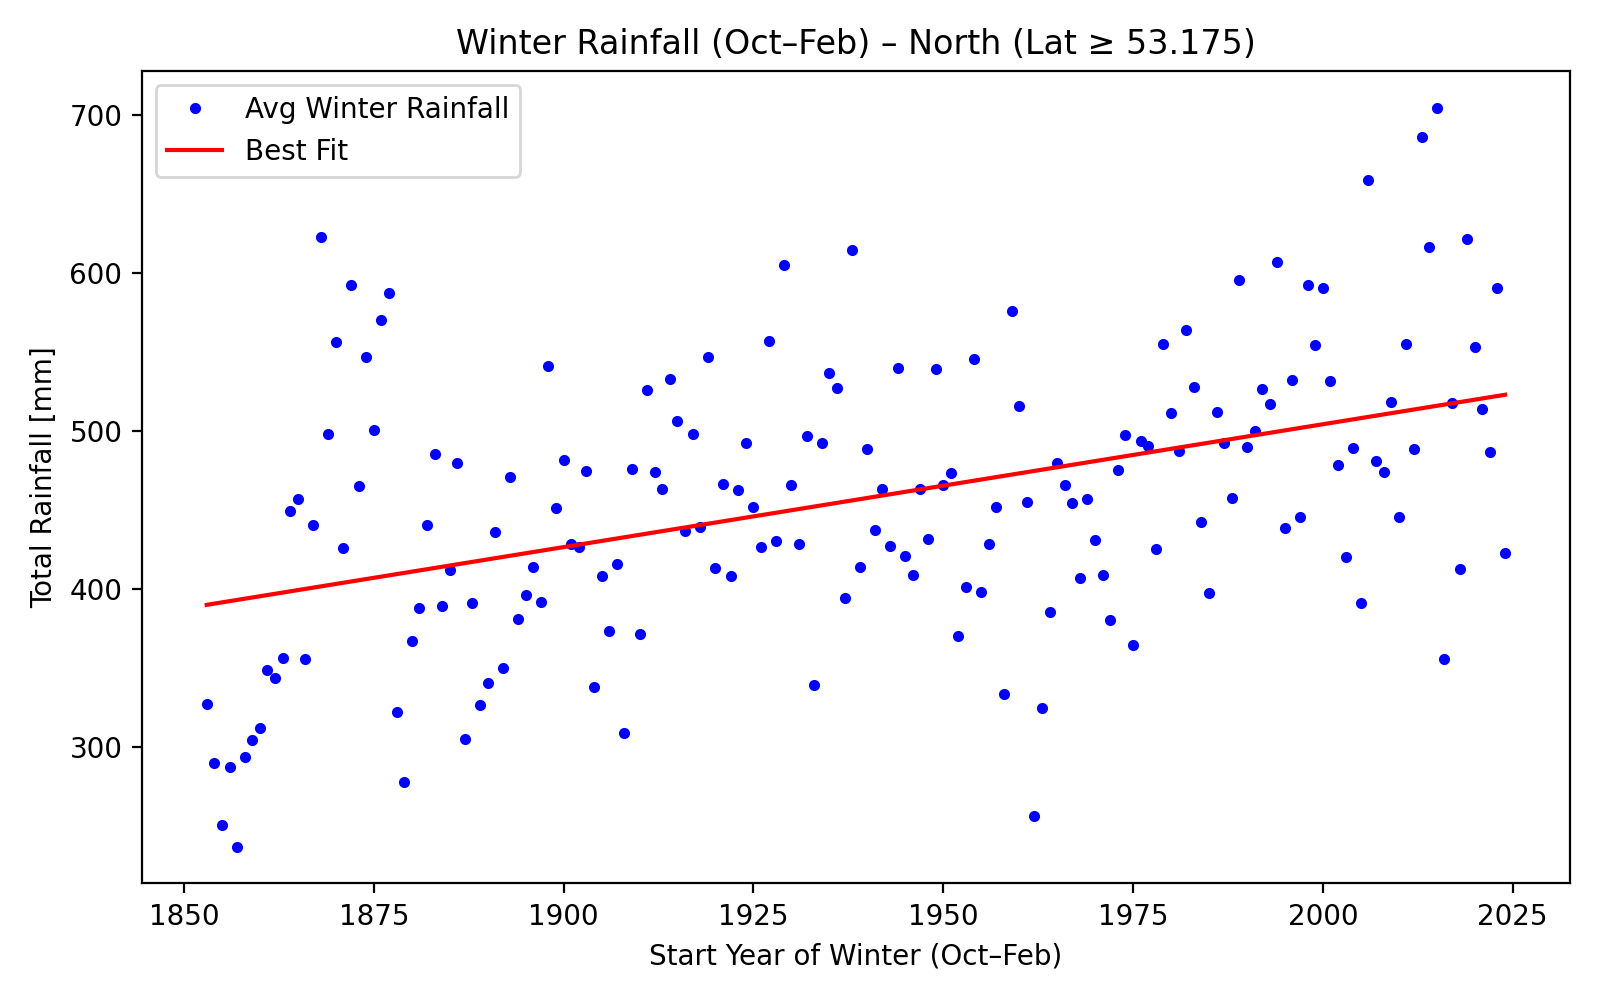

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

=== South (Lat < 53.175) ===
Total Oct 2023 – Feb 2024 rainfall: 529.8 mm
Linear Fit: Slope = 0.9674 ± 0.1229, Intercept = -1550.36 ± 238.24


<IPython.core.display.Javascript object>


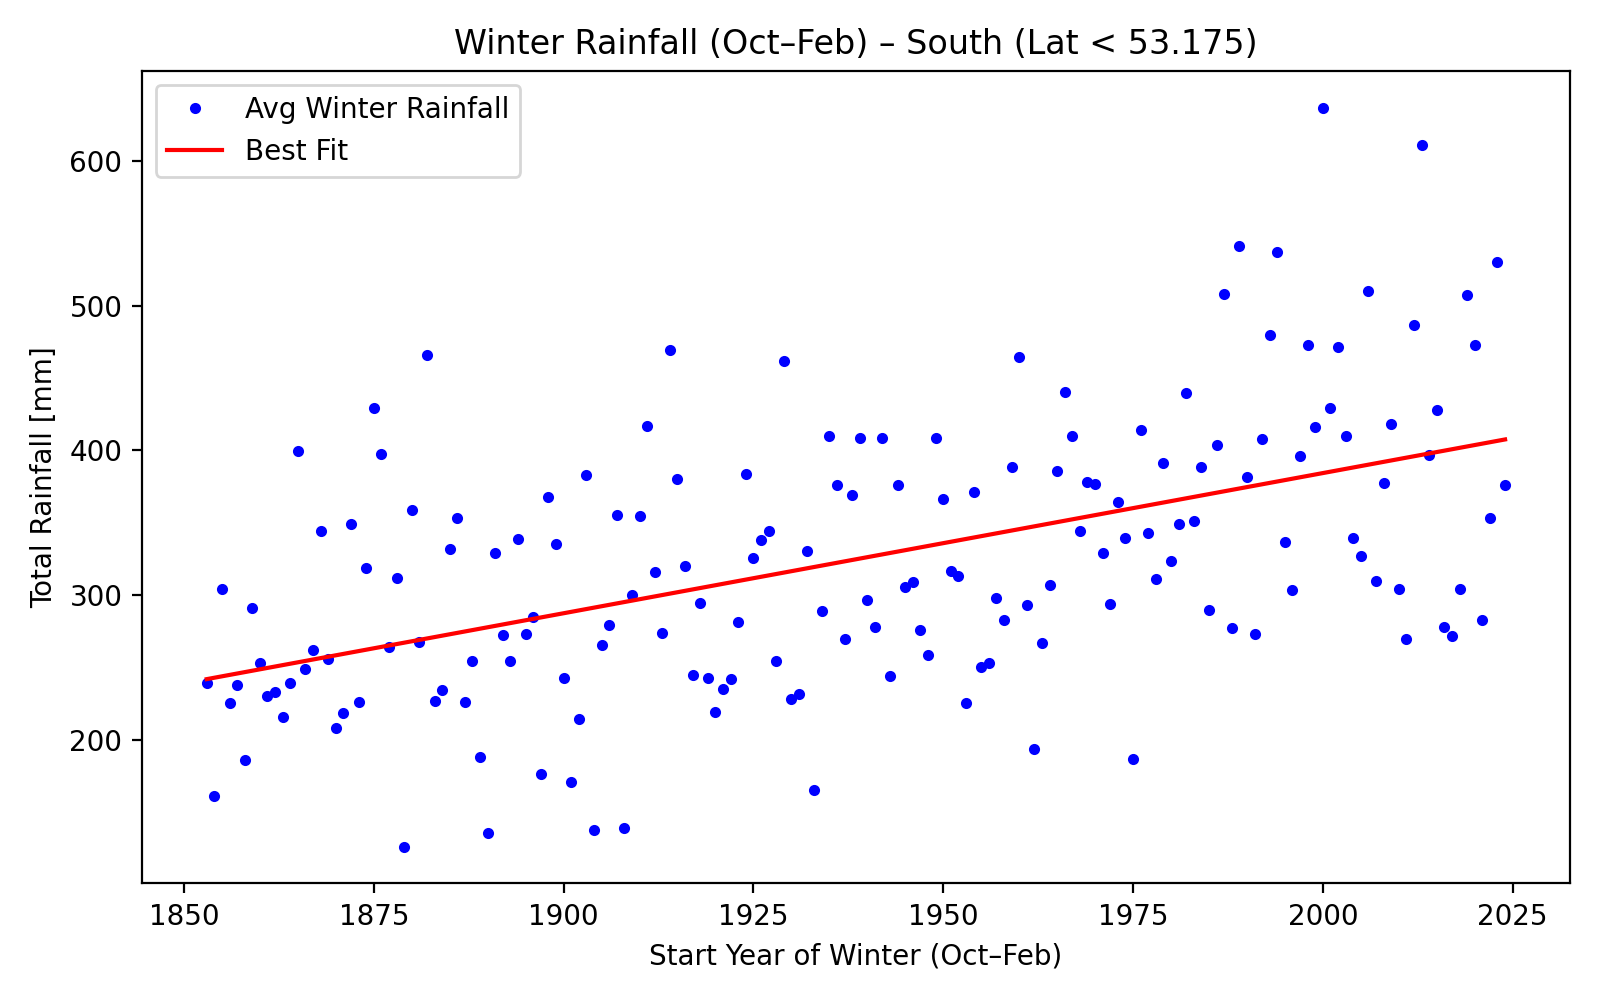

In [17]:
def get_station_latitude(filename):
    try:
        with open(filename, 'r') as f:
            lines = [next(f) for _ in range(2)]
            second_line = lines[1].lower()
            if 'lat' in second_line:
                parts = second_line.replace(',', '').split()
                for i, part in enumerate(parts):
                    if part == 'lat' and i + 1 < len(parts):
                        try:
                            return float(parts[i + 1])
                        except ValueError:
                            continue
    except Exception as e:
        print(f"Could not read latitude from {filename}: {e}")
    return None

def load_clean_data(filename):
    rows = []
    with open(filename, 'r') as f:
        for i, line in enumerate(f):
            if i < 7:
                continue
            line = line.split('#')[0].strip()
            if not line:
                continue
            parts = line.split()
            if len(parts) == 7:
                try:
                    row = [float(x) if x != '---' else np.nan for x in parts]
                    rows.append(row)
                except ValueError:
                    continue
    return np.array(rows)

file_list = [f for f in os.listdir('.') if f.endswith('.txt')]

north_files = []
south_files = []

for f in file_list:
    lat = get_station_latitude(f)
    if lat is not None:
        if lat >= 53.175:
            north_files.append(f)
        else:
            south_files.append(f)

print(f"Found {len(north_files)} stations in the North (lat ≥ 53.175)")
print(f"Found {len(south_files)} stations in the South (lat < 53.175)")

def process_group(file_group, label):
    winter_rain_by_year = {}
    rain_2023_2024 = []

    for filename in file_group:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=UserWarning)
                data = load_clean_data(filename)

            if data.shape[1] != 7:
                continue

            year = data[:, 0].astype(int)
            month = data[:, 1].astype(int)
            rain = data[:, 5]

            valid = ~np.isnan(rain)
            year = year[valid]
            month = month[valid]
            rain = rain[valid]

            for y in range(int(min(year)), int(max(year))):
                oct_dec_mask = (year == y) & (month >= 10) & (month <= 12)
                jan_feb_mask = (year == y + 1) & (month >= 1) & (month <= 2)

                total = np.sum(rain[oct_dec_mask]) + np.sum(rain[jan_feb_mask])
                if not np.isnan(total):
                    winter_rain_by_year.setdefault(y, []).append(total)

                if y == 2023:
                    rain_2023_2024.append(total)

        except Exception as e:
            print(f"Failed to process {filename}: {e}")

    common_years = sorted(winter_rain_by_year.keys())
    avg_rain = np.array([np.mean(winter_rain_by_year[y]) for y in common_years])
    common_years = np.array(common_years)

    if len(common_years) == 0:
        print(f"\n No valid winter data for {label}. Skipping plot.\n")
        return

    (coefs, cov) = np.polyfit(common_years, avg_rain, 1, cov=True)
    m, c = coefs
    m_err, c_err = np.sqrt(np.diag(cov))
    fit_line = m * common_years + c

    print(f"\n=== {label} ===")
    if rain_2023_2024:
        avg_2023_2024 = np.mean(rain_2023_2024)
        print(f"Total Oct 2023 – Feb 2024 rainfall: {avg_2023_2024:.1f} mm")
    else:
        avg_2023_2024 = None
        print("No Oct–Feb 2023–2024 data found.")

    print(f"Linear Fit: Slope = {m:.4f} ± {m_err:.4f}, Intercept = {c:.2f} ± {c_err:.2f}")

    plt.figure(figsize=(8, 5))
    plt.plot(common_years, avg_rain, 'b.', label='Avg Winter Rainfall')
    plt.plot(common_years, fit_line, 'r-', label='Best Fit')
    plt.xlabel('Start Year of Winter (Oct–Feb)')
    plt.ylabel('Total Rainfall [mm]')
    plt.title(f'Winter Rainfall (Oct–Feb) – {label}')
    plt.legend()
    plt.tight_layout()
    plt.show()

process_group(north_files, 'North (Lat ≥ 53.175)')
process_group(south_files, 'South (Lat < 53.175)')
